# Data wrangling WeRateDogs

##### By Abhijit Dey

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)
   

<a id='intro'></a>
## Introduction



The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

<a id='gather'></a>
## Gathering data

1. **Twitter archive file:** download this file manually by clicking the following link: twitter_archive_enhanced.csv

- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

**1. Twitter archive file**

In [1]:
#Import all packages needed

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import time
import requests
import seaborn as sns
import tweepy 
import re
import json 

In [2]:
#Read CSV file 
twitter1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter1.sort_values('timestamp')
twitter1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**2. Tweet image prediction**

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [6]:
images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [7]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Twitter API & JSON**


In [8]:
API_KEY = "nDSXEFWdtmYfsfazfUomB70ck"
API_SECRET_KEY = "IKAhScdTInro6XgmbEVDFSOdIBwx9djOUatfNLcNsfSpuZnJux"
ACCESS_TOKEN = "1257685348760432640-yhj5qrHYYzNhgCq546sol9T1dNy3zE"
ACCESS_TOKEN_SECRET = "8o7MsZ3kANQQ6lpK0AyWCiJ0xZmX6NIMrsE2OtQG2dO1Q"

auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)
        

In [11]:
# this starts the timer
start = time.time()

tweet_ids = twitter1.tweet_id.values

tweets_data = []
tweet_success = []
tweet_failure = []

for tweet_id in tweet_ids:
        try:
            data = api.get_status(tweet_id, tweet_mode='extended', 
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
            tweets_data.append(data)
            tweet_success.append(tweet_id)
        except:
            tweet_failure.append(tweet_id)
            print(tweet_id)

# this stops the timer            
end = time.time()


888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096
754011816964026368
697516214579523584
697482927769255936
697463031882764288
697270446429966336
697259378236399616
697255105972801536
697242256848379904
696900204696625153
696894894812565505
696886256886657024
696877980375769088
696754882863349760
696744641916489729
696713835009417216
696518437233913856
696490539101908992
696488710901260288
696405997980676096
696100768806522880
695816827381944320
695794761660297217
695767669421768709
695629776980148225
695446424020918272
695409464418041856
695314793360662529
695095422348574720
695074328191332352
695064344191

675707330206547968
675706639471788032
675534494439489536
675531475945709568
675522403582218240
675517828909424640
675501075957489664
675497103322386432
675489971617296384
675483430902214656
675432746517426176
675372240448454658
675362609739206656
675354435921575936
675349384339542016
675334060156301312
675166823650848770
675153376133427200
675149409102012420
675147105808306176
675146535592706048
675145476954566656
675135153782571009
675113801096802304
675111688094527488
675109292475830276
675047298674663426
675015141583413248
675006312288268288
675003128568291329
674999807681908736
674805413498527744
674800520222154752
674793399141146624
674790488185167872
674788554665512960
674781762103414784
674774481756377088
674767892831932416
674764817387900928
674754018082705410
674752233200820224
674743008475090944
674742531037511680
674739953134403584
674737130913071104
674690135443775488
674670581682434048
674664755118911488
674646392044941312
674644256330530816
674638615994089473
674632714662

667188689915760640
667182792070062081
667177989038297088
667176164155375616
667174963120574464
667171260800061440
667165590075940865
667160273090932737
667152164079423490
667138269671505920
667119796878725120
667090893657276420
667073648344346624
667070482143944705
667065535570550784
667062181243039745
667044094246576128
667012601033924608
666996132027977728
666983947667116034
666837028449972224
666835007768551424
666826780179869698
666817836334096384
666804364988780544
666786068205871104
666781792255496192
666776908487630848
666739327293083650
666701168228331520
666691418707132416
666649482315059201
666644823164719104
666454714377183233
666447344410484738
666437273139982337
666435652385423360
666430724426358785
666428276349472768
666421158376562688
666418789513326592
666411507551481857
666407126856765440
666396247373291520
666373753744588802
666362758909284353
666353288456101888
666345417576210432
666337882303524864
666293911632134144
666287406224695296
666273097616637952
666268910803

In [12]:
print("The list of tweets" ,len(tweet_success))
print("The list of tweets no found" , len(tweet_failure))

The list of tweets 1407
The list of tweets no found 949


In [17]:
for tweet_id in twitter1['tweet_id']:
            favorites = tweet['favorite_count'] # How many favorites the tweet had
            retweets = tweet['retweet_count'] # Count of the retweet
            user_followers = tweet['user']['followers_count'] # How many followers the user had
            user_favourites = tweet['user']['favourites_count'] # How many favorites the user had
            date_time = tweet['created_at'] # The date and time of the creation


In [18]:
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [19]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36291,7724,8773578,146003,2017-08-01 16:23:56+00:00
1,892177421306343426,31290,5717,8773578,146003,2017-08-01 00:17:27+00:00
2,891815181378084864,23564,3786,8773578,146003,2017-07-31 00:18:03+00:00
3,891689557279858688,39580,7878,8773578,146003,2017-07-30 15:58:51+00:00
4,891327558926688256,37784,8506,8773578,146003,2017-07-29 16:00:24+00:00
5,891087950875897856,19039,2848,8773578,146003,2017-07-29 00:08:17+00:00
6,890971913173991426,11089,1855,8773578,146003,2017-07-28 16:27:12+00:00
7,890729181411237888,61134,17240,8773578,146003,2017-07-28 00:22:40+00:00
8,890609185150312448,26197,3924,8773578,146003,2017-07-27 16:25:51+00:00
9,890240255349198849,29932,6717,8773578,146003,2017-07-26 15:59:51+00:00


In [20]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 6 columns):
tweet_id           552 non-null int64
favorites          552 non-null int64
retweets           552 non-null int64
user_followers     552 non-null int64
user_favourites    552 non-null int64
date_time          552 non-null object
dtypes: int64(5), object(1)
memory usage: 26.0+ KB


<a id='assess'></a>
## Assessing data

### Visual assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [21]:
twitter1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [22]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [25]:
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36310,7728,8772550,145980,2017-08-01 16:23:56+00:00
1,892177421306343426,31297,5719,8772551,145980,2017-08-01 00:17:27+00:00
2,891815181378084864,23573,3785,8772551,145980,2017-07-31 00:18:03+00:00
3,891689557279858688,39599,7881,8772551,145980,2017-07-30 15:58:51+00:00
4,891327558926688256,37799,8508,8772551,145980,2017-07-29 16:00:24+00:00
5,891087950875897856,19040,2848,8772551,145980,2017-07-29 00:08:17+00:00
6,890971913173991426,11088,1854,8772551,145980,2017-07-28 16:27:12+00:00
7,890729181411237888,61162,17247,8772551,145980,2017-07-28 00:22:40+00:00
8,890609185150312448,26206,3925,8772551,145980,2017-07-27 16:25:51+00:00
9,890240255349198849,29947,6716,8772551,145980,2017-07-26 15:59:51+00:00


### Programmatic assessment

Pandas' functions and/or methods are used to assess the data.

In [23]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [24]:
sum(twitter1['tweet_id'].duplicated())

0

In [25]:
twitter1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
print(twitter1.loc[twitter1.rating_numerator == 204, 'text']) 
print(twitter1.loc[twitter1.rating_numerator == 143, 'text']) 
print(twitter1.loc[twitter1.rating_numerator == 45, 'text']) 
print(twitter1.loc[twitter1.rating_numerator == 144, 'text'])
print(twitter1.loc[twitter1.rating_numerator == 80, 'text'])


1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
1274    From left to right:\nCletus, Jerome, Alejandro...
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
1254    Here's a brigade of puppers. All look very pre...
Name: text, dtype: object


In [27]:
#print whole text in order to verify numerators and denominators
print(twitter1['text'][1120]) 
print(twitter1['text'][1634])
print(twitter1['text'][313]) #just a tweet to explain actual ratings, this will be ignored when cleaning data
print(twitter1['text'][189]) #no picture, this will be ignored when cleaning data
print(twitter1['text'][1779]) 

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [28]:
twitter1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
print(twitter1.loc[twitter1.rating_denominator == 11, 'text']) 
print(twitter1.loc[twitter1.rating_denominator == 2, 'text']) 
print(twitter1.loc[twitter1.rating_denominator == 16, 'text']) 
print(twitter1.loc[twitter1.rating_denominator == 170, 'text'])
print(twitter1.loc[twitter1.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [30]:
print(twitter1['text'][784])
print(twitter1['text'][1068]) #actual rating 14/10 need to change manually
print(twitter1['text'][1662]) #actual rating 10/10 need to change manually
print(twitter1['text'][2335]) #actual rating 9/10 need to change manually
print(twitter1['text'][1663]) # tweet to explain rating
print(twitter1['text'][342]) #no rating - delete
print(twitter1['text'][516]) #no rating - delete

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [31]:
with pd.option_context('max_colwidth', 200):
    display(twitter1[twitter1['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\abhij\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [32]:
images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1428,772826264096874500,https://pbs.twimg.com/media/CrmhYYIXEAEcyYY.jpg,1,basset,0.915351,True,Walker_hound,0.072416,True,beagle,0.008229,True
500,675845657354215424,https://pbs.twimg.com/media/CWEWClfW4AAnqhG.jpg,1,pug,0.883952,True,Boston_bull,0.011057,True,French_bulldog,0.009840,True
559,677700003327029250,https://pbs.twimg.com/media/CWesj06W4AAIKl8.jpg,1,Siberian_husky,0.120849,True,junco,0.079206,False,malamute,0.063088,True
662,682638830361513985,https://pbs.twimg.com/media/CXk4W0qWYAMEMEs.jpg,1,English_springer,0.440781,True,Cardigan,0.411182,True,Border_collie,0.022412,True
933,703356393781329922,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
762,688898160958271489,https://pbs.twimg.com/media/CY91OENWUAE5agj.jpg,1,Ibizan_hound,0.853170,True,Chihuahua,0.039897,True,Italian_greyhound,0.035220,True
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
1809,832757312314028032,https://pbs.twimg.com/media/C46MWnFVYAUg1RK.jpg,2,Cardigan,0.160888,True,Staffordshire_bullterrier,0.159441,True,Boston_bull,0.154368,True
811,692417313023332352,https://pbs.twimg.com/media/CZv13u5WYAA6wQe.jpg,1,bison,0.208922,False,mink,0.169945,False,polecat,0.144494,False
761,688894073864884227,https://pbs.twimg.com/media/CY9xf1dUAAE4XLc.jpg,1,hog,0.669996,False,guinea_pig,0.077347,False,hamster,0.062398,False


In [33]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
sum(images.jpg_url.duplicated())

66

In [35]:
pd.concat(g for _, g in images.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [38]:
print(images.p1_dog.value_counts())
print(images.p2_dog.value_counts())
print(images.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [39]:
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [40]:
tweet_data.sample(10)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
208,850380195714523136,12916,2563,8773578,146003,2017-04-07 16:10:12+00:00
280,838083903487373313,17667,3138,8773582,146003,2017-03-04 17:49:08+00:00
478,813187593374461952,20287,4466,8773584,146003,2016-12-26 01:00:05+00:00
283,837471256429613056,12842,2278,8773582,146003,2017-03-03 01:14:41+00:00
346,829861396166877184,12334,1970,8773581,146003,2017-02-10 01:15:49+00:00
437,818588835076603904,0,6273,8773584,146003,2017-01-09 22:42:41+00:00
21,887517139158093824,43570,10770,8773578,146003,2017-07-19 03:39:09+00:00
311,833863086058651648,13496,2421,8773580,146003,2017-02-21 02:17:06+00:00
295,835536468978302976,0,1706,8773580,146003,2017-02-25 17:06:32+00:00
319,832757312314028032,16964,3654,8773580,146003,2017-02-18 01:03:09+00:00


In [41]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 6 columns):
tweet_id           552 non-null int64
favorites          552 non-null int64
retweets           552 non-null int64
user_followers     552 non-null int64
user_favourites    552 non-null int64
date_time          552 non-null object
dtypes: int64(5), object(1)
memory usage: 26.0+ KB


<a id='quality'></a>
### Quality

*Completeness, validity, accuracy, consistency (content issues)*

### *twitter1*
1. Keep original ratings (no retweets) that have images
- Data contains retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN)
- tweet_id is an integer
- timestamp and retweeted_status_timestamp are currently of type 'object' 
- source is in HTML format with a and \a tags surrounding the text
- name has values that are the string "None" instead of NaN
- Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc. Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old. It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies.
- Found an instance of a name being "O" instead of "O'Malley"
- doggo, floofer, pupper, and puppo have values that are the string "None" instead of NaN

### *images*
6. Drop 66 jpg_url duplicated
7. Create 1 column for image prediction and 1 column for confidence level
8. Delete columns that won't be used for analysis 

### *tweet_data*
1. Keep original tweets only


<a id='tidiness'></a>
### Tidiness 

1. Change tweet_id to type int64 in order to merge with the other 2 tables
- All tables should be part of one dataset

<a id='clean'></a>
## Cleaning Data

In [58]:
twitter1_clean = twitter1.copy()
images_clean = images.copy()
tweet_data_clean = tweet_data.copy()

**Twitter1** - keep original ratings (no retweets) that have images. 

In [59]:
#CODE: Delete retweets by filtering the NaN of retweeted_status_user_id
twitter1_clean = twitter1_clean[pd.isnull(twitter1_clean['retweeted_status_user_id'])]

#TEST
print(sum(twitter1_clean.retweeted_status_user_id.value_counts()))

0


**Twitter archive** - Delete columns that won't be used for analysis

In [60]:
#get the column names of twitter_archive_clean
print(list(twitter1_clean))

#CODE: Delete columns no needed
twitter1clean = twitter1_clean.drop(['source',
                                             'in_reply_to_status_id',
                                             'in_reply_to_user_id',
                                             'retweeted_status_id',
                                             'retweeted_status_user_id', 
                                             'retweeted_status_timestamp', 
                                             'expanded_urls'], 1)


['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [61]:
#TEST
list(twitter1_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**Twitter1** - Erroneous datatypes (doggo, floofer, pupper and puppo columns)

Melt the doggo, floofer, pupper and puppo columns to *dogs* and *dogs_stage* column. Then drop *dogs*. Sort by *dogs_stage* in order to then drop duplicated based on tweet_id except for the last occurrence.

In [48]:
#CODE: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
twitter1_clean = pd.melt(twitter1_clean, id_vars=['tweet_id',                                          
                                                           'timestamp',
                                                           'text',
                                                           'rating_numerator',
                                                           'rating_denominator',
                                                           'name'],
                               var_name='dogs', value_name='dogs_stage')

#CODE: drop dogs
twitter1clean = twitter1_clean.drop('dogs', 1)


In [49]:
#TEST
twitter1_clean['dogs_stage'].value_counts()

None                                                                                                                                                                                                                                                               8344
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                                                                                                                 2042
pupper                                                                                                                                                                                                                                                              234
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                                                                                                                                                 

**Twitter1** - Separate timestamp into day - month - year (3 columns)

First convert *timestamp* to datetime. Then extract year, month and day to new columns. Finally drop *timestamp* column. 

In [50]:
#CODE: convert timestamp to datetime
twitter1_clean['timestamp'] = pd.to_datetime(twitter1_clean['timestamp'])

#extract year, month and day to new columns
twitter1_clean['year'] = twitter1_clean['timestamp'].dt.year
twitter1_clean['month'] = twitter1_clean['timestamp'].dt.month
twitter1_clean['day'] = twitter1_clean['timestamp'].dt.day

#Finally drop timestamp column
twitter1_clean = twitter1_clean.drop('timestamp', 1)

In [51]:
#TEST
list(twitter1_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs',
 'dogs_stage',
 'year',
 'month',
 'day']

**Twitter1** - Correc numerators

In [52]:

twitter1_clean[['rating_numerator', 'rating_denominator']] = twitter1_clean[['rating_numerator','rating_denominator']].astype(float)

twitter1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23925 entries, 0 to 23924
Data columns (total 10 columns):
tweet_id              23925 non-null int64
text                  23925 non-null object
rating_numerator      23925 non-null float64
rating_denominator    23925 non-null float64
name                  23925 non-null object
dogs                  23925 non-null object
dogs_stage            13148 non-null object
year                  23925 non-null int64
month                 23925 non-null int64
day                   23925 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.8+ MB


In [53]:
#CODE

#First change numerator and denominators type int to float to allow decimals 
twitter1clean[['rating_numerator', 'rating_denominator']] = twitter1_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

twitter1_clean.loc[(twitter1_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter1_clean.loc[(twitter1_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter1_clean.loc[(twitter1_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter1_clean.loc[(twitter1_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter1_clean.loc[(twitter1_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#TEST
with pd.option_context('max_colwidth', 200):
    display(twitter1_clean[twitter1_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\abhij\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
617,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1510,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1533,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2217,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
2792,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


**Twitter_archive** - Correc denominators

#### *Manually*
Five tweets with denominator not equal to 10 for special circunstances. Update both numerators and denominators when necessary. Delete other five tweets because they do not have actual ratings.

In [54]:
#CODE: Update both numerators and denominators
twitter1clean.loc[(twitter1_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter1_clean.loc[(twitter1_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter1_clean.loc[(twitter1_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter1_clean.loc[(twitter1_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter1_clean.loc[(twitter1_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter1_clean.loc[(twitter1_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter1_clean.loc[(twitter1_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter1_clean.loc[(twitter1_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter1_clean.loc[(twitter1_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter1_clean.loc[(twitter1_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
twitter1_clean = twitter1_clean[twitter1_clean['tweet_id'] != 832088576586297345]
twitter1_clean = twitter1_clean[twitter1_clean['tweet_id'] != 810984652412424192]
twitter1_clean = twitter1_clean[twitter1_clean['tweet_id'] != 682808988178739200]
twitter1_clean = twitter1_clean[twitter1_clean['tweet_id'] != 835246439529840640]
twitter1_clean = twitter1_clean[twitter1clean['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(twitter1_clean[twitter1_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

C:\Users\abhij\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,tweet_id,text,rating_numerator,rating_denominator
363,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
733,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
942,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1050,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1075,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1095,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1172,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1254,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1455,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
1456,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0


#### *Programatically* 
These tweets with denominator not equal to 10 are multiple dogs. For example, tweet_id 713900603437621249 has numerator and denominators 99/90 because there are 9 dogs in the picture https://t.co/mpvaVxKmc1.  

In [55]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
twitter1_clean['rating'] = 10 * twitter1_clean['rating_numerator'] / twitter1_clean['rating_denominator'].astype(float)

#TEST
twitter1_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs,dogs_stage,year,month,day,rating
15088,668528771708952576,This is Gòrdón. He enjoys his razberrita by po...,12.0,10.0,Gòrdón,expanded_urls,https://twitter.com/dog_rates/status/668528771...,2015,11,22,12.0
16230,718939241951195136,This is Otis. Everybody look at Otis. 12/10 wo...,12.0,10.0,Otis,doggo,None,2016,4,9,12.0
14026,725458796924002305,Pup had to be removed cuz it wouldn't have bee...,13.0,10.0,None,expanded_urls,https://twitter.com/foxdeportes/status/7251360...,2016,4,27,13.0
19860,832369877331693569,This is Charlie. He fell asleep on a heating v...,11.0,10.0,Charlie,pupper,None,2017,2,16,11.0
9901,701214700881756160,"I'm not sure what's happening here, but it's p...",12.0,10.0,None,retweeted_status_user_id,NaN,2016,2,21,12.0


##  Quality issue 4/5/6 - Various issues with 'name'
### Define
### Issue:

>name has values that are the string "None" instead of NaN
Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc. Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old. It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies.
I also found an instand of a name being "O" instead of "O'Malley"
Solution: Replace all inaccurate names with NaNs, and the "O" with "O'Malley".

### Code

In [79]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter1_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [80]:
# Replace all names that start with a lowercase letter with a NaN
twitter1_clean['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter1_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Replace the name 'O' with "O'Malley" 
twitter1_clean['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

In [81]:
# Check value counts to see that None and names starting with 
# a lowercase letter are gone
twitter1_clean['name'].value_counts()


Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Lola          8
Winston       8
Sadie         8
Daisy         7
Toby          7
Jax           6
Stanley       6
Bella         6
Bo            6
Koda          6
Oscar         6
Bailey        6
Buddy         5
Louis         5
Rusty         5
Dave          5
Scout         5
Bentley       5
Milo          5
Leo           5
Chester       5
Jeffrey       4
Maggie        4
Gus           4
             ..
Pablo         1
Skye          1
Sora          1
Grizzie       1
Chompsky      1
Maks          1
Beemo         1
Huck          1
Koko          1
Theo          1
Reptar        1
Hubertson     1
Naphaniel     1
Humphrey      1
River         1
Kial          1
Laika         1
Chelsea       1
Astrid        1
Pubert        1
Sailor        1
Taz           1
Mookie        1
Juckson       1
Superpup      1
Ron           1
Ricky         1
Ronduh        1
Ferg          1
Shiloh        1
Name: name, Length: 930,

## 'TimeStamp' datatype

In [105]:
twitter1_clean['timestamp'] = twitter1_clean['timestamp'].str.slice(start=0, stop=-6)

In [106]:
twitter1_clean['timestamp'] = pd.to_datetime(twitter1_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [108]:
twitter1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
rating                      

## Innaccutare Ratings
**Code**

In [82]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter1_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [69]:
# Print the index of text with decimal ratings
ratings_with_decimals_index

[45, 340, 695, 763, 1689, 1712]

In [83]:
# preceeding 2 cells
twitter1_clean.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter1_clean.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter1_clean.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter1_clean.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])

**Test**

In [85]:
# Check contents of row with index 40 to ensure the rating is corrected
twitter1_clean.loc[40]

tweet_id                                                     884562892145688576
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-11 00:00:02 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Kevin. He's just so happy. 13/10 what ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/884562892...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

## Unstandardized ratings

**Define**
>**Issue**: For future analysis it could be confusing to interpret unstandardized ratings. It is their gimmick to give dogs a rating of 100% but not all are above 100% so it could be interesting to see what % are below or above 100% and how this changed overtime by calculating a single value for rating.

>**Solution** : Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'
 
 **Code**
 

In [86]:
# Calulate the value of 'rating'
twitter1_clean['rating'] = twitter1_clean['rating_numerator'] / twitter1_clean['rating_denominator']

In [87]:
# Check for presence of new column and correct calculation
twitter1_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,1.3


**7. Images** - Drop 66 jpg_url duplicated

In [88]:
#CODE: Delete duplicated jpg_url
images_clean = images_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(images_clean['jpg_url'].duplicated())

0

**8. Images** - Create 1 column for image prediction and 1 column for confidence level

Create a function where I keep the first true prediction along the confidence level as new columns. 

In [89]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(images_clean):
    if images_clean['p1_dog'] == True:
        dog_type.append(images_clean['p1'])
        confidence_list.append(images_clean['p1_conf'])
    elif images_clean['p2_dog'] == True:
        dog_type.append(images_clean['p2'])
        confidence_list.append(images_clean['p2_conf'])
    elif images_clean['p3_dog'] == True:
        dog_type.append(images_clean['p3'])
        confidence_list.append(images_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
images_clean.apply(image, axis=1)

#create new columns
images_clean['dog_type'] = dog_type
images_clean['confidence_list'] = confidence_list

In [90]:
#drop rows that has prediction_list 'error'
images_clean = images_clean[images_clean['dog_type'] != 'Error']

#TEST: 
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


**9. Images** - Delete columns that won't be used for analysis

In [91]:
#CODE: print list of image_prediction columns
print(list(images_clean))

#Delete columns
images_clean = images_clean.drop(['img_num', 'p1', 
                                                'p1_conf', 'p1_dog', 
                                                'p2', 'p2_conf', 
                                                'p2_dog', 'p3', 
                                                'p3_conf', 
                                                'p3_dog'], 1)

#TEST
list(images_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

**10. Tidiness** - Change tweet_id to type int64 in order to merge with the other 2 tables

In [92]:
#CODE: change tweet_id from str to int
tweet_data_clean['tweet_id'] = tweet_data_clean['tweet_id'].astype(int)

#TEST
tweet_data_clean['tweet_id'].dtypes

dtype('int32')

**11. Tidiness** - All tables should be part of one dataset

In [93]:
#CODE: create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twitter2 = pd.merge(twitter1_clean, 
                      images_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter2 = df_twitter2[df_twitter2['jpg_url'].notnull()]

#TEST
df_twitter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 1 to 2174
Data columns (total 21 columns):
tweet_id                      1626 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1626 non-null object
source                        1626 non-null object
text                          1626 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1626 non-null object
rating_numerator              1626 non-null float64
rating_denominator            1626 non-null int64
name                          1143 non-null object
doggo                         1626 non-null object
floofer                       1626 non-null object
pupper                        1626 non-null object
puppo                         1626 non-null object
rating                        1626 n

In [94]:
#CODE: create a new dataframe that merge df_twitter and tweet_json_clean
df_twitter = pd.merge(df_twitter2, tweet_data_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 26 columns):
tweet_id                      1626 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1626 non-null object
source                        1626 non-null object
text                          1626 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1626 non-null object
rating_numerator              1626 non-null float64
rating_denominator            1626 non-null int64
name                          1143 non-null object
doggo                         1626 non-null object
floofer                       1626 non-null object
pupper                        1626 non-null object
puppo                         1626 non-null object
rating                        1626 n

In [95]:
df_twitter['rating_numerator'].value_counts()

12.00     404
10.00     353
11.00     342
13.00     211
9.00      133
8.00       68
7.00       32
14.00      21
6.00       16
5.00       13
4.00        7
3.00        5
2.00        2
9.75        1
99.00       1
13.50       1
11.27       1
0.00        1
165.00      1
84.00       1
24.00       1
144.00      1
1.00        1
88.00       1
121.00      1
50.00       1
80.00       1
45.00       1
60.00       1
44.00       1
26.00       1
143.00      1
Name: rating_numerator, dtype: int64

<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

In [96]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

<a id='one'></a>
### Insight one & visualization

Golden retriever is the most common dog in this dataset.

In [97]:
df_twitter['dog_type'].value_counts()

golden_retriever                  143
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Shih-Tzu                           20
Staffordshire_bullterrier          20
Siberian_husky                     20
Rottweiler                         19
Maltese_dog                        19
Cardigan                           19
Shetland_sheepdog                  19
beagle                             19
kuvasz                             18
Lakeland_terrier                   17
Italian_grey

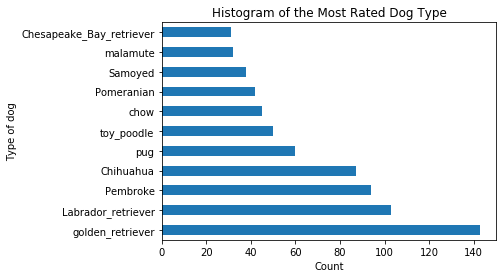

In [98]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 31)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

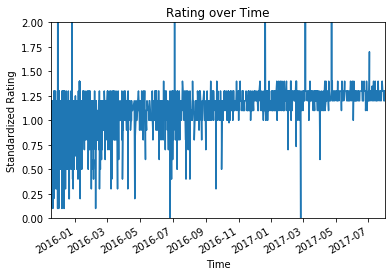

In [113]:
#Plot standardized ratings over time with ylim of 0-2
twitter1_clean.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
fig = plt.gcf() 
fig.savefig('output1.png',bbox_inches='tight');

>Indeed it appears that overtime the frequency of ratings below 1 decreases. Before 2016-11 there many ratings below 1, while after that time there are barely any.

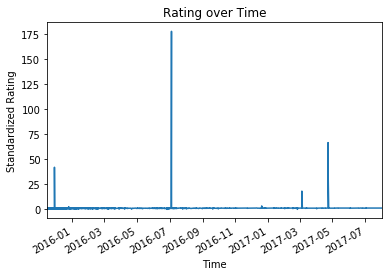

In [124]:
# Plot standardized ratings over time
twitter1_clean.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
fig = plt.gcf() 
fig.savefig('output2.png',bbox_inches='tight');

>The first instance is a rating of 24/7 which is inaccurate and I had found when looking for quality errors but decided not to fix. If we were required to fix all problems then thix tweet could be removed but I will ignore in this case. The other 2 tweets are accurate ratings that are jokes. I am more interested if the tweets with a standardized rating of below 1 decrease over time therefore I will limit the y axis from 0 to 2.

<a id='two'></a>
### Insight two
Japanese_spaniel has the lowest average rating
Clumber has the highest average rating

In [115]:
df_dog_type_mean = df_twitter.groupby('dog_type').mean()


In [116]:
df_dog_type_mean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,rating,favorites,retweets,user_followers,user_favourites
dog_type,,,,,,,,,,,,
Afghan_hound,8.095999e+17,NaN,NaN,NaN,NaN,8.000000,10.0,0.800000,NaN,NaN,NaN,NaN
Airedale,7.184489e+17,NaN,NaN,NaN,NaN,9.833333,10.0,0.983333,NaN,NaN,NaN,NaN
American_Staffordshire_terrier,7.597284e+17,NaN,NaN,NaN,NaN,10.312500,10.0,1.031250,NaN,NaN,NaN,NaN
Appenzeller,7.939334e+17,NaN,NaN,NaN,NaN,11.000000,10.0,1.100000,NaN,NaN,NaN,NaN
Australian_terrier,7.785921e+17,NaN,NaN,NaN,NaN,11.500000,10.0,1.150000,NaN,NaN,NaN,NaN


In [117]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel               0.500000
Afghan_hound                   0.800000
soft-coated_wheaten_terrier    0.880000
Walker_hound                   0.900000
Scotch_terrier                 0.900000
Tibetan_terrier                0.925000
dalmatian                      0.927273
Boston_bull                    0.941667
Welsh_springer_spaniel         0.950000
Saint_Bernard                  0.950000
Maltese_dog                    0.952632
Dandie_Dinmont                 0.957143
miniature_schnauzer            0.960000
Norwich_terrier                0.960000
redbone                        0.966667
English_setter                 0.971429
Scottish_deerhound             0.975000
Rhodesian_ridgeback            0.975000
Irish_terrier                  0.980000
Great_Dane                     0.981818
Airedale                       0.983333
papillon                       0.983333
Mexican_hairless               0.985714
Newfoundland                   0.985714
miniature_poodle               

In [118]:
df_twitter[df_twitter['dog_type'] == 'golden_retriever']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,puppo,rating,jpg_url,dog_type,confidence_list,favorites,retweets,user_followers,user_favourites,date_time
13,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,...,puppo,1.30,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,0.953442,NaN,NaN,NaN,NaN,NaN
15,888917238123831296,NaN,NaN,2017-07-23 00:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888917238...,...,None,1.20,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,golden_retriever,0.714719,NaN,NaN,NaN,NaN,NaN
16,888804989199671297,NaN,NaN,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He has a new stick. Very proud o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888804989...,...,None,1.30,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,golden_retriever,0.46976,NaN,NaN,NaN,NaN,NaN
35,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,...,None,1.35,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,NaN,NaN,NaN,NaN,NaN
37,883117836046086144,NaN,NaN,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883117836...,...,None,1.30,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,golden_retriever,0.949562,NaN,NaN,NaN,NaN,NaN
41,882268110199369728,NaN,NaN,2017-07-04 16:01:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfy. You're witnessing his first wate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882268110...,...,None,1.30,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,golden_retriever,0.762211,NaN,NaN,NaN,NaN,NaN
42,882045870035918850,NaN,NaN,2017-07-04 01:18:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Koko. Her owner, inspired by Barney, r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/882045870...,...,None,1.30,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,golden_retriever,0.00694063,NaN,NaN,NaN,NaN,NaN
47,880465832366813184,NaN,NaN,2017-06-29 16:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880465832...,...,None,1.20,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,golden_retriever,0.913255,NaN,NaN,NaN,NaN,NaN
63,876484053909872640,NaN,NaN,2017-06-18 16:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He wants to thank you for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876484053...,...,None,1.30,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,golden_retriever,0.874566,NaN,NaN,NaN,NaN,NaN
85,870374049280663552,NaN,NaN,2017-06-01 20:18:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049...,...,None,1.30,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,golden_retriever,0.841001,NaN,NaN,NaN,NaN,NaN


<a id='three'></a>
### Insight three & visualization

Dog_types with low number of ratings show a high variaty of mean ratings. 

In [119]:
df_dog_type_count = df_twitter.groupby('dog_type').count()
df_dog_type_count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,pupper,puppo,rating,jpg_url,confidence_list,favorites,retweets,user_followers,user_favourites,date_time
dog_type,,,,,,,,,,,,,,,,,,,,,
Afghan_hound,2,0,0,2,2,2,0,0,0,2,...,2,2,2,2,2,0,0,0,0,0
Airedale,12,0,0,12,12,12,0,0,0,12,...,12,12,12,12,12,0,0,0,0,0
American_Staffordshire_terrier,16,0,0,16,16,16,0,0,0,16,...,16,16,16,16,16,0,0,0,0,0
Appenzeller,2,0,0,2,2,2,0,0,0,2,...,2,2,2,2,2,0,0,0,0,0
Australian_terrier,2,0,0,2,2,2,0,0,0,2,...,2,2,2,2,2,0,0,0,0,0
Bedlington_terrier,6,0,0,6,6,6,0,0,0,6,...,6,6,6,6,6,0,0,0,0,0
Bernese_mountain_dog,11,0,0,11,11,11,0,0,0,11,...,11,11,11,11,11,0,0,0,0,0
Blenheim_spaniel,10,0,0,10,10,10,0,0,0,10,...,10,10,10,10,10,0,0,0,0,0
Border_collie,12,0,0,12,12,12,0,0,0,12,...,12,12,12,12,12,0,0,0,0,0


In [120]:
dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

dog_type
Afghan_hound                      0.800000
Airedale                          0.983333
American_Staffordshire_terrier    1.031250
Appenzeller                       1.100000
Australian_terrier                1.150000
Bedlington_terrier                1.033333
Bernese_mountain_dog              1.127273
Blenheim_spaniel                  1.110000
Border_collie                     1.058333
Border_terrier                    1.214286
Boston_bull                       0.941667
Bouvier_des_Flandres              1.300000
Brabancon_griffon                 1.000000
Brittany_spaniel                  1.037500
Cardigan                          1.110526
Chesapeake_Bay_retriever          1.083871
Chihuahua                         1.040648
Dandie_Dinmont                    0.957143
Doberman                          1.133333
English_setter                    0.971429
English_springer                  1.055556
EntleBucher                       1.100000
Eskimo_dog                        1.140909
Fr

In [121]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,2,0.800000
Airedale,12,0.983333
American_Staffordshire_terrier,16,1.031250
Appenzeller,2,1.100000
Australian_terrier,2,1.150000
Bedlington_terrier,6,1.033333
Bernese_mountain_dog,11,1.127273
Blenheim_spaniel,10,1.110000
Border_collie,12,1.058333


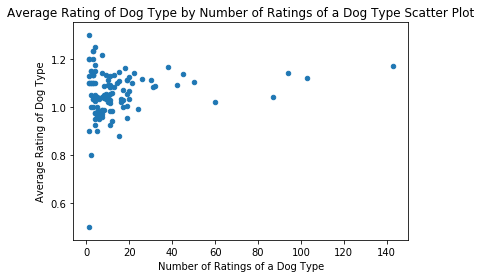

In [123]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output3.png',bbox_inches='tight');

**Thank you**
